### Q learning versus SARSA

In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt

ROWS=4
COLUMNS=21

START = "S"
GOAL = "G"
CLIFF = "C"
PIT = "P"

UP = "^"
DOWN = "v"
RIGHT = ">"
LEFT = "<"
ACTIONS = [UP, DOWN, RIGHT, LEFT]
ACTION_POSITION_MAPPER = {
    UP: (-1, 0),
    RIGHT: (0, 1),
    DOWN: (1, 0),
    LEFT: (0, -1)
}

START_POSITION = (3, 0)
GOAL_POSITION = (3, 20)
CLIFF_POSITIONS = [(3, cliff_column_index) for cliff_column_index in range(1, COLUMNS - 1)]

def get_world():
    world = [[random.choice(ACTIONS) for _ in range(COLUMNS)] for _ in range(ROWS)]
    
    world[START_POSITION[0]][START_POSITION[1]] = START
    world[GOAL_POSITION[0]][GOAL_POSITION[1]] = GOAL
    for cliff_position in CLIFF_POSITIONS:
       world[cliff_position[0]][cliff_position[1]] = CLIFF
    
    return world

def print_world(world):
    for row in world:
        print(" ".join(row))

def choose_action(Q, new_state, epsilon=0.5):
    if np.random.uniform(0, 1) < epsilon:
        return random.choice(ACTIONS)
    else:
        actions_utilities = Q[new_state]
        return ACTIONS[np.argmax(actions_utilities)]

def get_start_state():
    return START_POSITION

def get_new_state(world, current_state, action):
  position_updater = ACTION_POSITION_MAPPER[action]
  new_state = (current_state[0] + position_updater[0], current_state[1] + position_updater[1])
  
  # row invalidation
  if new_state[0] < 0 or new_state[0] > ROWS - 1:
     return current_state
  
  # column invalidation
  if new_state[1] < 0 or new_state[1] > COLUMNS - 1:
    return current_state
  
  # wall invalidation
  if world[new_state[0]][new_state[1]] == CLIFF:
    return current_state

  return new_state

def final_state(state):
    return state == GOAL_POSITION or state in CLIFF_POSITIONS

def get_reward(position):
    if position == GOAL_POSITION:
        return 20
    
    if position in CLIFF_POSITIONS:
        return -100
    
    return -1


In [11]:
def run_sarsa(epochs = 2000, epsilon=0, alpha = 0.1, gamma = 0.9):
  world = get_world()
  Q = {(i,j):[0, 0 ,0 , 0] for i in range(ROWS) for j in range(COLUMNS)}

  rewards_history = []
  for epoch in range(epochs):
    current_state = get_start_state()
    current_action = choose_action(Q, current_state, epsilon=epsilon)

    reward_per_epoch = 0  
    while not final_state(current_state):
      new_state = get_new_state(world, current_state, current_action)
      new_action = choose_action(Q, new_state, epsilon=epsilon)

      reward = get_reward(new_state)
      reward_per_epoch += reward

      current_action_index_in_Q = ACTIONS.index(current_action)
      Q_current = Q[current_state][current_action_index_in_Q]
      
      new_action_index_in_Q = ACTIONS.index(current_action)
      Q_next = Q[new_state][new_action_index_in_Q]
      
      Q[current_state][current_action_index_in_Q] = Q_current + (alpha * (reward + gamma * Q_next - Q_current))

      current_state = new_state
      current_action = new_action
    
    rewards_history.append(reward_per_epoch)
  
  return Q, rewards_history

#### Epsilon variable

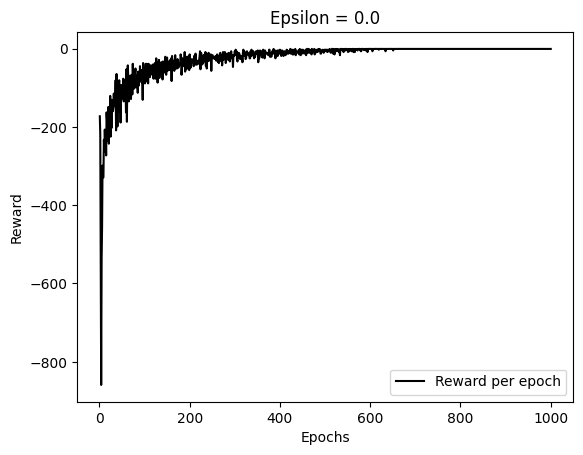

v v v ^ > > > > > ^ > > > > > > > > > > v
^ ^ > ^ > v > > > > > > > > > > > > > > v
> > > > > > > > > > > > > > > > > > > > v
S C C C C C C C C C C C C C C C C C C C G
--------------------------------------------------------------------------------


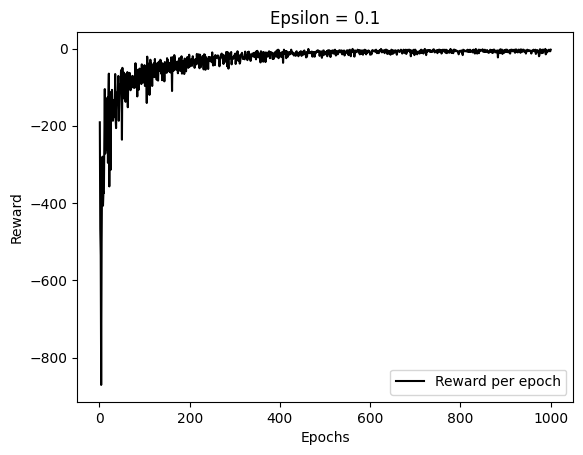

v > > > > > > > > > > > > > > > > > > > v
< > > > > > > > > > > > > > > > > > > > v
^ > > > > > > > > > > > > > > > v > > > v
S C C C C C C C C C C C C C C C C C C C G
--------------------------------------------------------------------------------


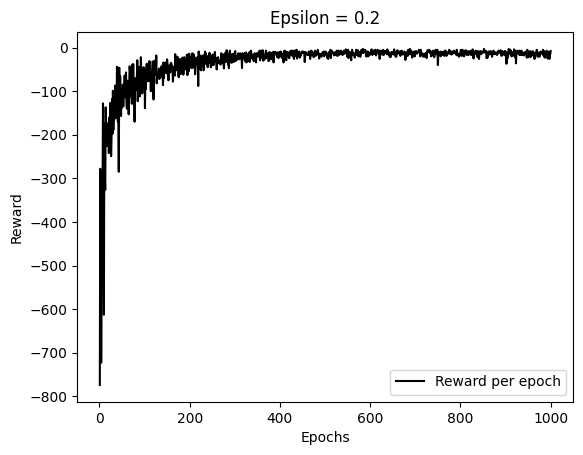

> > > > > > > > > > > ^ > > > > > > > > v
^ > > > > > > > ^ > > > > > > > > > ^ ^ v
^ > > > > ^ > > > > > > > > ^ v > ^ > ^ v
S C C C C C C C C C C C C C C C C C C C G
--------------------------------------------------------------------------------


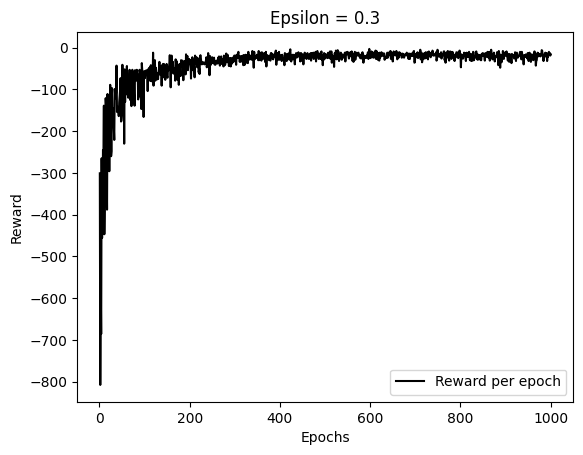

< > > > > > > > < > > > > > > > > > > > v
> > > > > > > > > ^ > ^ > v > ^ > ^ > ^ v
^ > > > > > > > > > > ^ > > > > v ^ ^ v v
S C C C C C C C C C C C C C C C C C C C G
--------------------------------------------------------------------------------


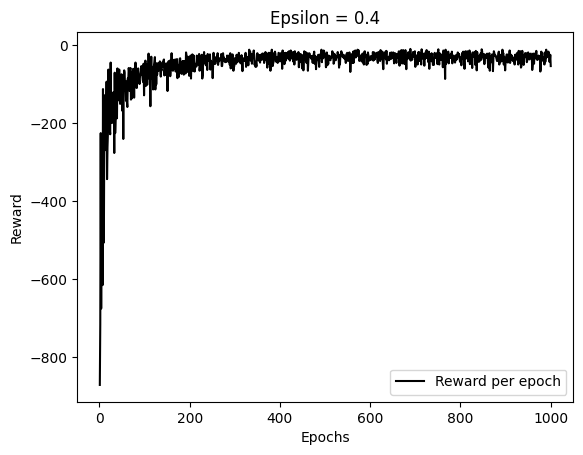

> > > > > > > ^ > > > > > > ^ < > > > > v
> < > > v v ^ > > > ^ > > > > > > ^ ^ ^ v
> ^ > > > > > ^ > > > ^ ^ > v ^ > < ^ v v
S C C C C C C C C C C C C C C C C C C C G
--------------------------------------------------------------------------------


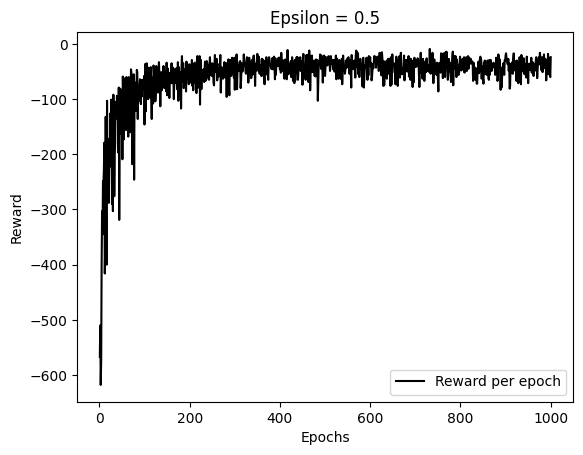

< v v > > > > > > > > > > > > > > > > > v
^ > ^ > > > > > v > > > ^ > > > > v > v v
> > > > > v ^ v > > > > > > > > > > ^ < v
S C C C C C C C C C C C C C C C C C C C G
--------------------------------------------------------------------------------


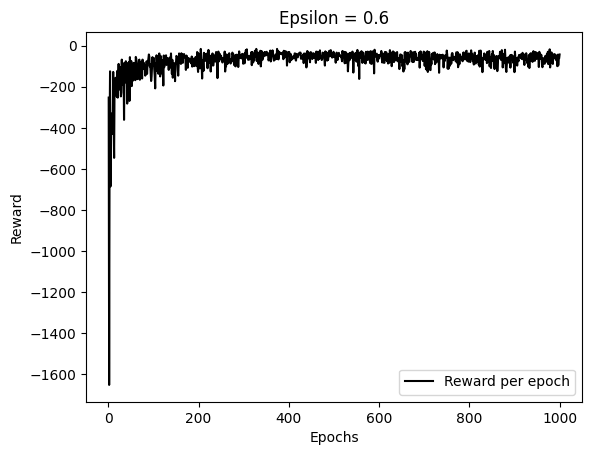

^ > > > ^ > < > > > ^ ^ > > > > > > > > v
^ < > > > ^ > ^ > > ^ v > > > > ^ > v v v
^ > ^ > > > > > > > ^ > > > > > < > > > v
S C C C C C C C C C C C C C C C C C C C G
--------------------------------------------------------------------------------


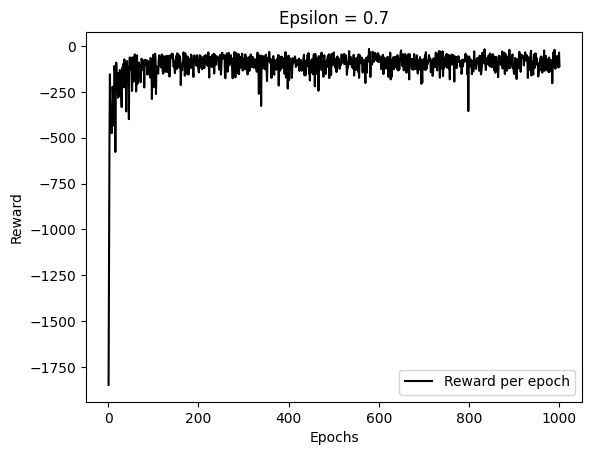

> < ^ > > > ^ > > > > > > > > > > > > > v
> > ^ v > ^ ^ ^ ^ v v > ^ v ^ ^ < ^ < > v
^ ^ > > > > ^ ^ ^ ^ v v ^ > v ^ > ^ ^ > v
S C C C C C C C C C C C C C C C C C C C G
--------------------------------------------------------------------------------


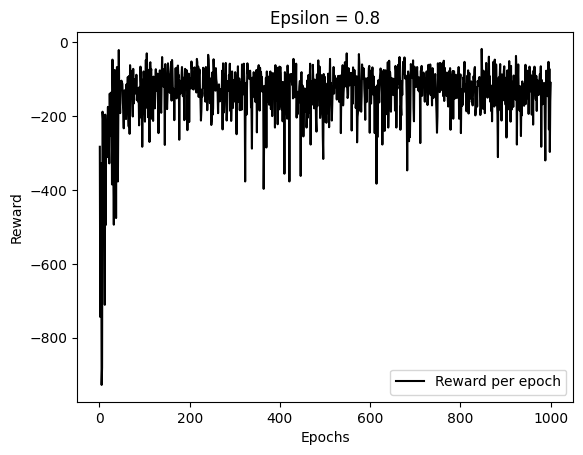

> > > > v > > > > > > > > > > > > > ^ > v
^ > > > > > > > v > > > > v > > ^ v > > v
> v > > > > > > > > > v > v > > > > > > v
S C C C C C C C C C C C C C C C C C C C G
--------------------------------------------------------------------------------


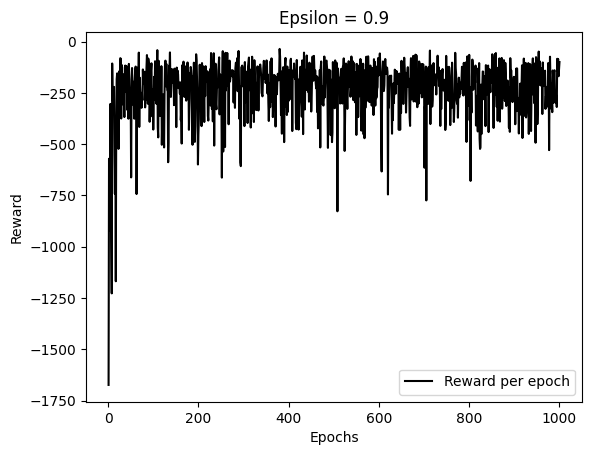

> > > > v ^ > > > > > ^ > > > > > > > > v
> > > > v ^ > v > > ^ ^ > > > > > > v v v
> > > > > > > > > > > > > > > > > > > > v
S C C C C C C C C C C C C C C C C C C C G
--------------------------------------------------------------------------------


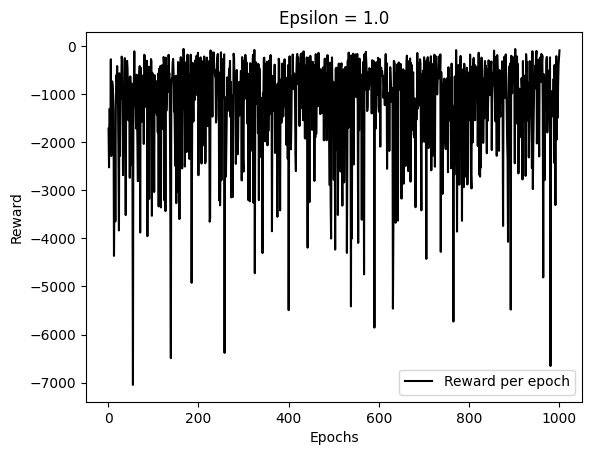

> > > > > > > > > > > > > > > > > > > v v
> > > > > > > > > > > > > > > > > > > > v
> > > > > > > > > > > > > > > > > > > > v
S C C C C C C C C C C C C C C C C C C C G
--------------------------------------------------------------------------------


In [10]:
epochs = 1000
x = np.linspace(1, epochs, epochs)

for epsilon in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    Q, rewards_history = run_sarsa(epochs=epochs, epsilon=epsilon)
    # Plot rewards
    plt.plot(x, rewards_history, color='black', label=f"Reward per epoch")
    plt.xlabel('Epochs')
    plt.ylabel('Reward')
    plt.legend()
    plt.title(f"Epsilon = {epsilon}")
    plt.show()

    world = get_world()
    for position in Q:
        actions_utilities = Q[position]
        if world[position[0]][position[1]] not in [GOAL, START, CLIFF]:
            world[position[0]][position[1]] = ACTIONS[np.argmax(actions_utilities)]
    
    # Printing world
    print_world(world)

    print("-" * 80)